# Covid-19 Explorations in Mulnomah County, Portland Oregon

In [15]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
from matplotlib.ticker import MultipleLocator
import seaborn as sns

# remove warning
# https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
# https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series
# https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv
df = pd.read_csv('time_series_covid19_confirmed_US.csv')

In [3]:
dfm = df[(df.Province_State == 'Oregon') & (df.Admin2 == 'Multnomah')]
# good spot to do a query ☝️

In [4]:
dfm.drop(['UID','iso2','iso3','code3','FIPS','Admin2','Province_State','Country_Region','Lat','Long_','Combined_Key'], axis=1, inplace=True)

In [5]:
# list(dfm)
dfm.head()
# dfm.describe()
# dfm.columns.values.tolist()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21
2316,0,0,0,0,0,0,0,0,0,0,...,32668,32692,32736,32795,32864,32971,33005,33042,33076,33153


In [6]:
# Pandas.melt() unpivots a DataFrame from wide format to long format.
dfm = dfm.melt(var_name ='date', value_name='cases')
dfm.set_index('date', inplace=True)

# Converting the index as date
dfm.index = pd.to_datetime(dfm.index)
# dfm.tail()

In [7]:
dfm['new_cases'] = dfm.diff(axis=0)
dfm['new_cases'] = dfm['new_cases'].fillna(0)
dfm.tail()

,cases,new_cases
date,,
2021-03-26,32971,107.0
2021-03-27,33005,34.0
2021-03-28,33042,37.0
2021-03-29,33076,34.0
2021-03-30,33153,77.0


<AxesSubplot:xlabel='date'>

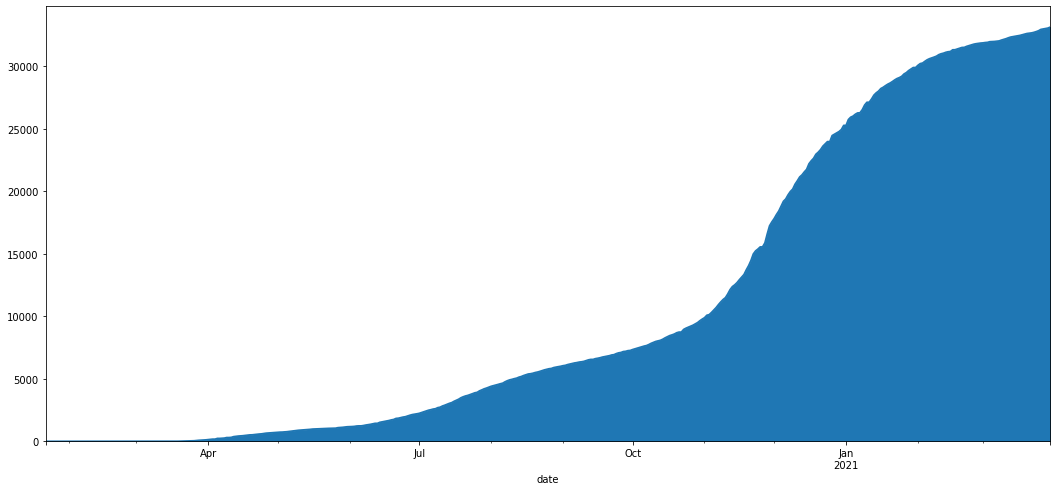

In [8]:
dfm.cases.plot(figsize=(18,8), kind='area')

<AxesSubplot:xlabel='date'>

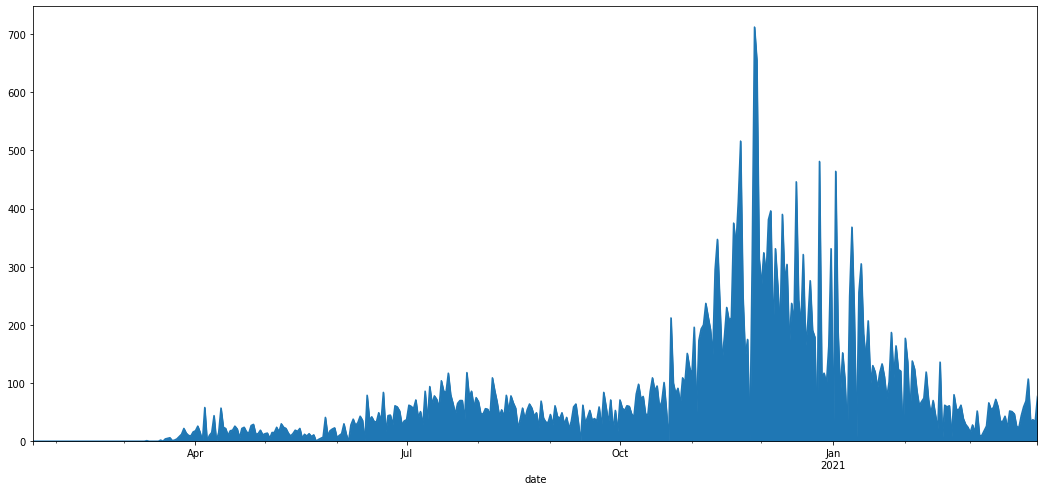

In [9]:
dfm.new_cases.plot(figsize=(18,8), kind='area')
# dfm.new_cases.plot(figsize=(18,8), kind='bar')

In [10]:
# dfm.plot()

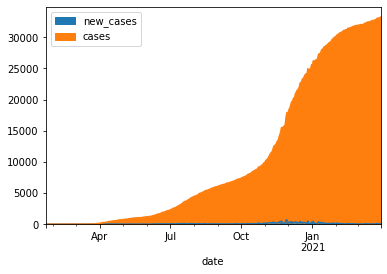

In [11]:
ax = dfm.plot.area(y=['new_cases', 'cases'])

---
## Goal: 
* #### make a visually appealing plot
* #### have `cases` and `new_cases` overlayed on each other
* #### scale `cases` to match with `new_cases`, indicate this scale in the legend

In [12]:
# create column week_number on new_cases
    # for seaborn histogram
    # group by week
dfm['date'] = dfm.index
dfm['date_delta'] = dfm.date.apply(lambda x: x - dfm.iloc[0].date)
dfm['date_week'] = dfm.date.apply(lambda x: x.week)
dfm['date_year'] = dfm.date.apply(lambda x: x.year)
dfm.tail()

,cases,new_cases,date,date_delta,date_week,date_year
date,,,,,,
2021-03-26,32971,107.0,2021-03-26,429 days,12,2021
2021-03-27,33005,34.0,2021-03-27,430 days,12,2021
2021-03-28,33042,37.0,2021-03-28,431 days,12,2021
2021-03-29,33076,34.0,2021-03-29,432 days,13,2021
2021-03-30,33153,77.0,2021-03-30,433 days,13,2021


In [13]:
dfm.iloc[-1].date.strftime('%B %d %Y')

'March 30 2021'

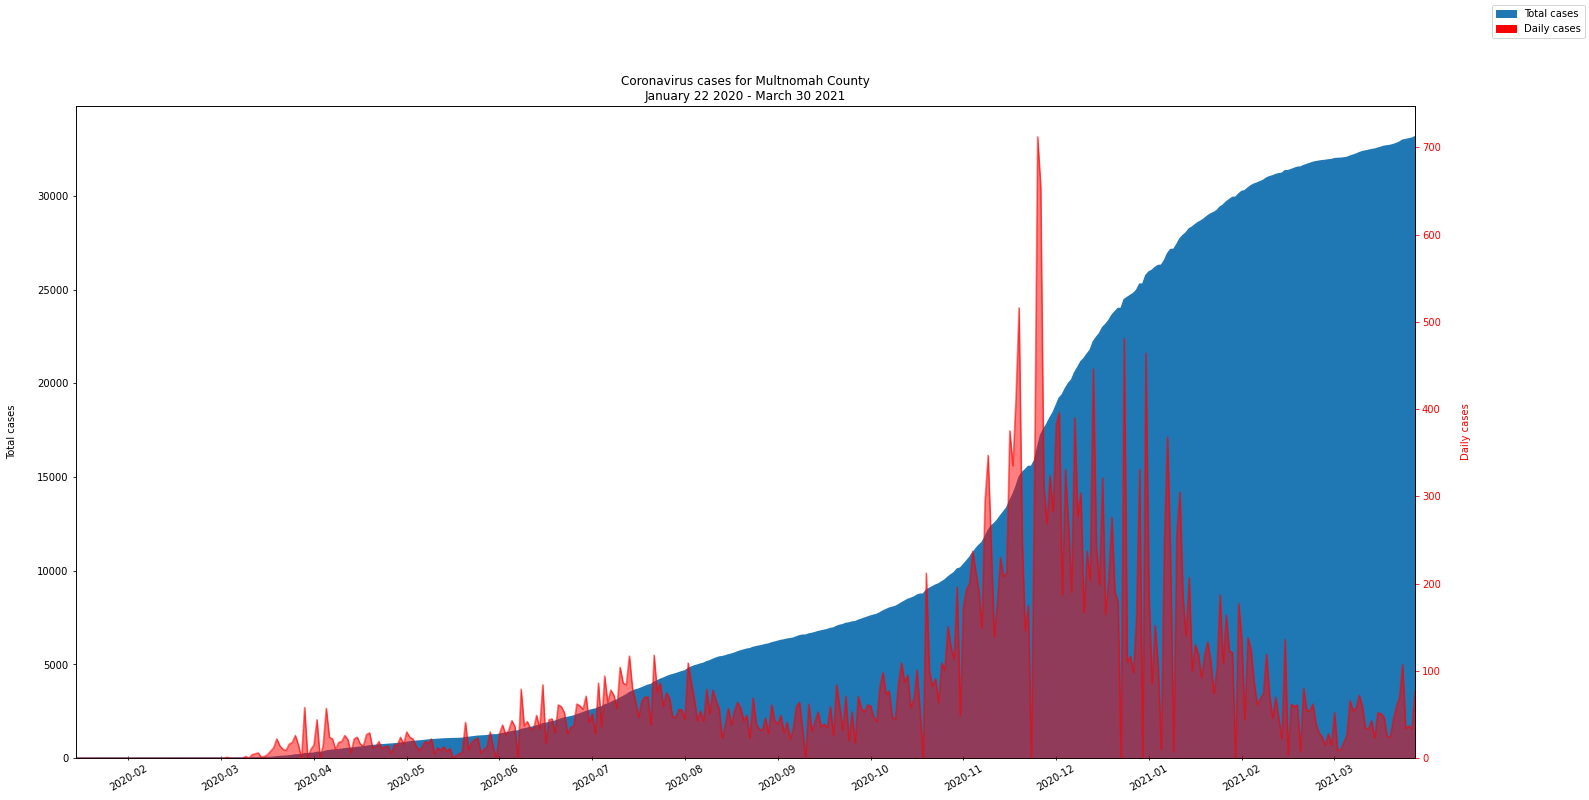

In [16]:
# attempting dual axis stacked area charts using just matplolib
# success !!!

# to increase readibility:
    # Xupdate legend colors to match
    # Xupdate legend descriptions
    # add deaths - line chart?
        # on second thought - i predict deaths & cases will be solid are charts
        # and new_cases can be a line chart
            # change new_cases to 7 running average
    # change font
    # add interactivity - hover states
    # stylesheets?

ax = dfm.cases.plot(
    figsize=(24,12),
    legend=False,
    kind='area',
    color='C0',
    title=f'Coronavirus cases for Multnomah County\n{dfm.iloc[0].date.strftime("%B %d %Y")} - {dfm.iloc[-1].date.strftime("%B %d %Y")}'
)

ax2 = ax.twinx()

# ax.tick_params(axis='y', colors='C0')
ax2.tick_params(axis='y', colors='r')
# ax.tick_params(which='major', length=8, labelrotation=45)
# ax.set_xticks(np.arange(0, len(dfm)+1, 5))

# ax2.spines['left'].set_color('C0')
# ax2.spines['right'].set_color('r')

dfm.new_cases.plot(ax=ax2, legend=False, color='r', kind='area', alpha=0.5)
# plt.xticks(np.arange(0, len(dfm)+1, 5))
ax.xaxis.set_major_locator(MultipleLocator(30))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.set_xlabel('')
ax.set_ylabel('Total cases', labelpad=20)
ax2.set_ylabel('Daily cases', labelpad=20)
ax2.yaxis.label.set_color('r')
# ax.tick_params(axis='y', which='major', pad=15)
ax.tick_params(axis='x', which='major', labelrotation=30, direction='inout')
ax.tick_params(axis='x', which='minor', bottom=False)

cases_patch = mpatches.Patch(color='C0', label='Total cases')
new_cases_patch = mpatches.Patch(color='r', label='Daily cases')

# plt.legend(handles=[red_patch, blue_patch])
ax.figure.legend(handles=[cases_patch, new_cases_patch])
# ax.figure.tight_layout()

# create fig first
# pass ax as param to plot

In [17]:
# success ! ☝️☝️☝️ (need to update legend and text values)

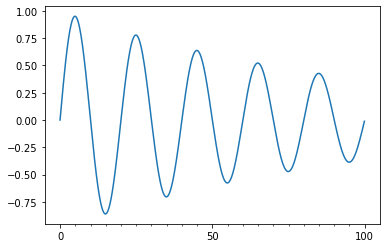

In [18]:
t = np.arange(0.0, 100.0, 0.1)
s = np.sin(0.1 * np.pi * t) * np.exp(-t * 0.01)

fig, ax = plt.subplots()
ax.plot(t, s)

# Make a plot with major ticks that are multiples of 20 and minor ticks that
# are multiples of 5.  Label major ticks with '.0f' formatting but don't label
# minor ticks.  The string is used directly, the `StrMethodFormatter` is
# created automatically.
ax.xaxis.set_major_locator(MultipleLocator(50))
ax.xaxis.set_major_formatter('{x:.0f}')

# For the minor ticks, use no labels; default NullFormatter.
ax.xaxis.set_minor_locator(MultipleLocator(5))

---

---

---

---

---

# ☠️☠️☠️ graveyard of ideas and attempts 👇👇👇

In [12]:
# dfm['2020-03-11':'2020-04-11']

In [13]:
int((dfm.iloc[61].date - dfm.iloc[0].date) / np.timedelta64(1, 'W'))

AttributeError: 'Series' object has no attribute 'date'

In [15]:
# dfm.iloc[1].date - dfm.iloc[0].date

In [16]:
# sns.histplot(data=dfm, x=dfm.date_week, y=dfm.new_cases)

In [17]:
# dfm['2020-03-11':'2020-04-30']
dfm.tail()

,cases,new_cases,date,date_delta,date_week,date_year
date,,,,,,
2021-03-20,32643,47.0,2021-03-20,423 days,11,2021
2021-03-21,32668,25.0,2021-03-21,424 days,11,2021
2021-03-22,32692,24.0,2021-03-22,425 days,12,2021
2021-03-23,32736,44.0,2021-03-23,426 days,12,2021
2021-03-24,32795,59.0,2021-03-24,427 days,12,2021


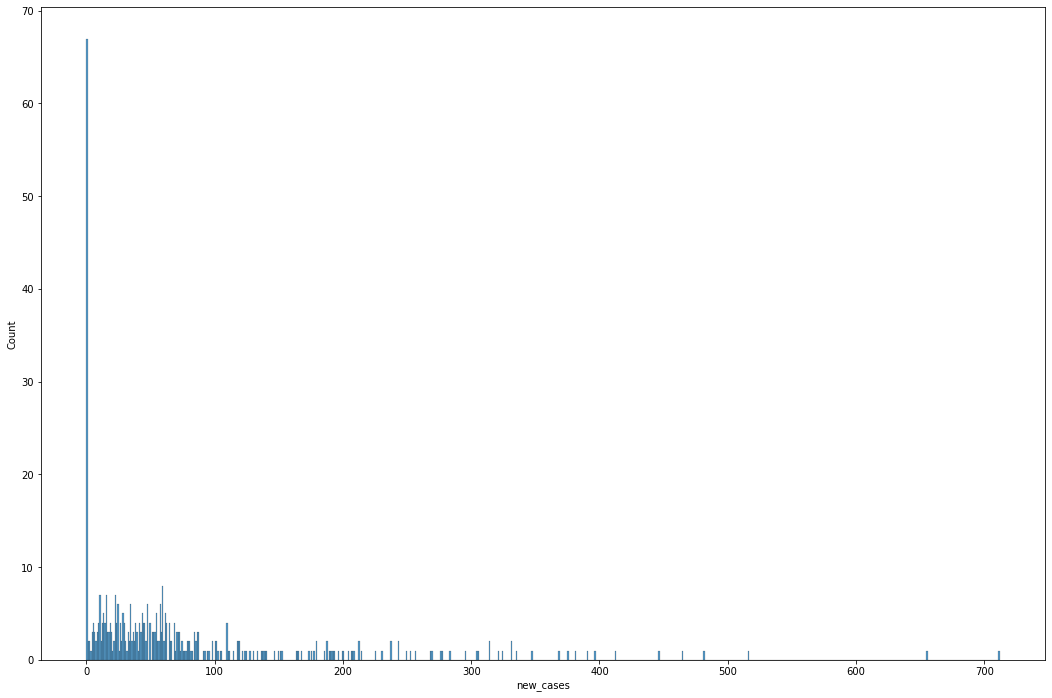

In [18]:
plt.figure(figsize=(18,12))
ax = sns.histplot(dfm, x="new_cases", binwidth=1)

In [19]:
dfm.new_cases.describe()

count    428.000000
mean      76.623832
std      101.116095
min        0.000000
25%       13.000000
50%       44.500000
75%       87.000000
max      712.000000
Name: new_cases, dtype: float64

In [20]:
dfm.new_cases.sort_values()

date
2020-01-22      0.0
2020-02-27      0.0
2020-02-28      0.0
2020-02-29      0.0
2020-03-01      0.0
              ...  
2021-01-02    464.0
2020-12-26    481.0
2020-11-22    516.0
2020-11-29    655.0
2020-11-28    712.0
Name: new_cases, Length: 428, dtype: float64